to connect your drive

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

In [ ]:
cd drive

install the requirements packages 

In [ ]:
!pip install libtorrent
!pip install torf 
!pip wget

you need to copy the magnet file link from the website 

In [ ]:
import zipfile
import os
import libtorrent as lt
import time
import datetime
import shutil

params = {
    'save_path': '/content/Torrent/',
    'storage_mode': lt.storage_mode_t(2),
}

ses = lt.session()
ses.listen_on(6881, 6891)
link = input("Input Torrent file link or Magnet link and Press Enter: ")

if link.endswith('.torrent'):
    import wget
    from torf import Torrent

    if os.path.exists('torrent.torrent'):
        os.remove('torrent.torrent')

    wget.download(link, 'torrent.torrent')
    t = Torrent.read('torrent.torrent')
    link = str(t.magnet(name=True, size=False, trackers=False, tracker=False))


print(link)
handle = lt.add_magnet_uri(ses, link, params)
# change the 0 to a 1 to download sequentially
handle.set_sequential_download(0)
ses.start_dht()
begin = time.time()

print(datetime.datetime.now())
print('Downloading Metadata...')

while not handle.has_metadata():
    time.sleep(1)

print('Got Metadata, Starting Torrent Download...')
print("Starting", handle.name())

while handle.status().state != lt.torrent_status.seeding:
    s = handle.status()
    state_str = ['queued', 'checking', 'downloading metadata',
                 'downloading', 'finished', 'seeding', 'allocating']
    print('%.2f%% complete (down: %.1f kb/s up: %.1f kB/s peers: %d) %s ' %
          (s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000,
           s.num_peers, state_str[s.state]))
    time.sleep(5)

end = time.time()
print(handle.name(), "COMPLETE")
print("Elapsed Time: ", int((end - begin) // 60), "min :", int((end - begin) % 60), "sec")
print(datetime.datetime.now())

now you need to copy the date into your drive   jsut replace your torrent folder path to  your drive path

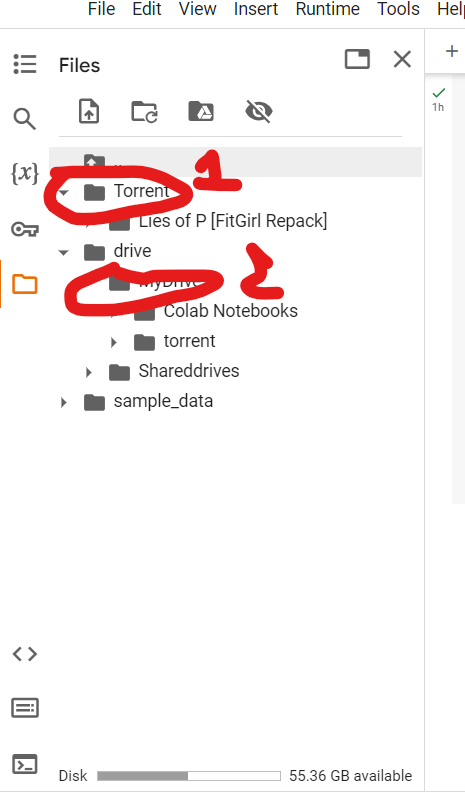

In [ ]:
!cp -r "the 1 path" "the 2 path"
